In [289]:
# Imports a utilizar 
import numpy as np
import matplotlib as plt
import pandas as pd
import seaborn as sns
import plotly.express as px

from quickda.explore_data import *
from quickda.clean_data import *
from quickda.explore_numeric import *
from quickda.explore_categoric import *
from quickda.explore_numeric_categoric import *
from quickda.explore_time_series import *
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

### Abrir la data y observar su tipo de variable

In [290]:
# Crea una lista vacía para guardar los DataFrames
dfs = []

for year in range(2009, 2019):
    filename = f"data{year}.sav"
    df = pd.read_spss(filename)
    dfs.append(df)
    df['Year'] = year

# Concatena los DataFrames en uno solo
merged_df = pd.concat(dfs)

# Muestra las primeras 5 filas del DataFrame combinado
print(merged_df['Year'].unique())

[2009 2010 2011 2012 2013 2014 2015 2016 2017 2018]


In [291]:
templistamuni = list(merged_df['Depreg'].unique())
for i in templistamuni:
    print(i, type(i))

Guatemala <class 'str'>
Solola <class 'str'>
Santa Rosa <class 'str'>
Quiche <class 'str'>
Izabal <class 'str'>
El Progreso <class 'str'>
Jutiapa <class 'str'>
Chimaltenango <class 'str'>
Sacatepequez <class 'str'>
Escuintla <class 'str'>
Jalapa <class 'str'>
Peten <class 'str'>
Chiquimula <class 'str'>
Quetzaltenango <class 'str'>
San Marcos <class 'str'>
Baja Verapaz <class 'str'>
Alta Verapaz <class 'str'>
Zacapa <class 'str'>
Suchitepequez <class 'str'>
Totonicapan <class 'str'>
Retalhuleu <class 'str'>
Huehuetenango <class 'str'>


In [292]:
print(merged_df[merged_df['Year'] == 2009].size)
print(merged_df[merged_df['Year'] == 2010].size)
print(merged_df[merged_df['Year'] == 2011].size)
print(merged_df[merged_df['Year'] == 2012].size)
print(merged_df[merged_df['Year'] == 2013].size)
print(merged_df[merged_df['Year'] == 2014].size)
print(merged_df[merged_df['Year'] == 2015].size)
print(merged_df[merged_df['Year'] == 2016].size)
print(merged_df[merged_df['Year'] == 2017].size)
print(merged_df[merged_df['Year'] == 2018].size)
print(merged_df.size)

20746052
21352454
22047828
22928167
22853178
22785505
23094075
23032538
22518176
22612517
223970490


In [293]:
merged_df.size

223970490

In [294]:
merged_df.columns

Index(['Depreg', 'mupreg', 'Mesreg', 'Añoreg', 'Depocu', 'Mupocu', 'Areag',
       'Libras', 'Onzas', 'Diaocu', 'Mesocu', 'Añoocu', 'Sexo', 'Tipar',
       'Edadp', 'Deprep', 'muprep', 'Gretnp', 'Escivp', 'Depnap', 'Mupnap',
       'Naciop', 'Ocupap', 'Edadm', 'Deprem', 'Muprem', 'Gretnm', 'Escivm',
       'Depnam', 'Mupnam', 'Naciom', 'Ocupam', 'Asisrec', 'Sitioocu', 'Tohite',
       'Tohinm', 'Tohivi', 'Year', 'mupnap', 'Escolap', 'muprem', 'grupetma',
       'mupnam', 'Escolam', 'Mupreg', 'Muprep', 'Paisrep', 'Paisnacp',
       'Paisrem', 'Paisnacm', 'munnam', 'PuebloPP', 'Ciuopad', 'PuebloPM',
       'Ciuomad', 'Munpnap', 'ciuomad', 'TipoIns', 'ViaPar'],
      dtype='object')

In [295]:
merged_df.dtypes

Depreg      category
mupreg      category
Mesreg      category
Añoreg       float64
Depocu      category
Mupocu        object
Areag       category
Libras        object
Onzas         object
Diaocu       float64
Mesocu      category
Añoocu       float64
Sexo        category
Tipar         object
Edadp         object
Deprep      category
muprep        object
Gretnp      category
Escivp      category
Depnap        object
Mupnap        object
Naciop        object
Ocupap        object
Edadm         object
Deprem      category
Muprem        object
Gretnm      category
Escivm      category
Depnam        object
Mupnam        object
Naciom        object
Ocupam        object
Asisrec       object
Sitioocu      object
Tohite        object
Tohinm        object
Tohivi        object
Year           int64
mupnap      category
Escolap       object
muprem      category
grupetma    category
mupnam      category
Escolam       object
Mupreg        object
Muprep        object
Paisrep       object
Paisnacp     

In [296]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3796110 entries, 0 to 383262
Data columns (total 59 columns):
 #   Column    Dtype   
---  ------    -----   
 0   Depreg    category
 1   mupreg    category
 2   Mesreg    category
 3   Añoreg    float64 
 4   Depocu    category
 5   Mupocu    object  
 6   Areag     category
 7   Libras    object  
 8   Onzas     object  
 9   Diaocu    float64 
 10  Mesocu    category
 11  Añoocu    float64 
 12  Sexo      category
 13  Tipar     object  
 14  Edadp     object  
 15  Deprep    category
 16  muprep    object  
 17  Gretnp    category
 18  Escivp    category
 19  Depnap    object  
 20  Mupnap    object  
 21  Naciop    object  
 22  Ocupap    object  
 23  Edadm     object  
 24  Deprem    category
 25  Muprem    object  
 26  Gretnm    category
 27  Escivm    category
 28  Depnam    object  
 29  Mupnam    object  
 30  Naciom    object  
 31  Ocupam    object  
 32  Asisrec   object  
 33  Sitioocu  object  
 34  Tohite    object  


In [297]:
columns = merged_df.columns
numeric_data = merged_df._get_numeric_data().columns

categorical_data = set(columns) - set(numeric_data)
print("-> Columnas con valores numericos \n ",numeric_data ,'\n')
print("-> Columnas con valores categoricos\n ",categorical_data)

-> Columnas con valores numericos 
  Index(['Añoreg', 'Diaocu', 'Añoocu', 'Year'], dtype='object') 

-> Columnas con valores categoricos
  {'Paisnacm', 'Mesreg', 'Paisnacp', 'Onzas', 'Depnam', 'TipoIns', 'mupnam', 'Naciop', 'Deprem', 'Tohinm', 'mupnap', 'Escolam', 'Tohite', 'PuebloPP', 'Libras', 'Depocu', 'Mupocu', 'Mupnap', 'Naciom', 'muprep', 'Depreg', 'Muprep', 'Depnap', 'Gretnm', 'Mupreg', 'Escolap', 'Escivm', 'Asisrec', 'grupetma', 'Tohivi', 'Escivp', 'Areag', 'Ocupap', 'Mupnam', 'muprem', 'Ocupam', 'Ciuopad', 'Sitioocu', 'Paisrep', 'Muprem', 'Sexo', 'Edadp', 'ViaPar', 'Mesocu', 'mupreg', 'Edadm', 'Deprep', 'Ciuomad', 'munnam', 'Paisrem', 'Tipar', 'PuebloPM', 'ciuomad', 'Munpnap', 'Gretnp'}


In [298]:
merged_df.size

223970490

### Limpieza de Variables

Se toman las columnas que van a ser utilizadas en el modelo predictivo. Estas son:
- Departamento de registro
- Municipio de registro
- Escolaridad de la madre
- Escolaridad del padre
- Año de registro

In [299]:
columnas_deseadas = ['Depreg', 'Escolam', 'Escolap', 'Year', 'Asisrec', 'Sitioocu']
data = merged_df.drop(columns=merged_df.columns.difference(columnas_deseadas))

In [300]:
filas_originales = merged_df.shape[0]
filas_finales = data.shape[0]

# Calcular la diferencia en el número de filas
diferencia_filas = filas_originales - filas_finales

# Imprimir la diferencia en el número de filas
print("Diferencia en el número de filas:", diferencia_filas)

Diferencia en el número de filas: 0


Vamos a verificar si la data que estamos tomando contiene valores nulos o NaN.

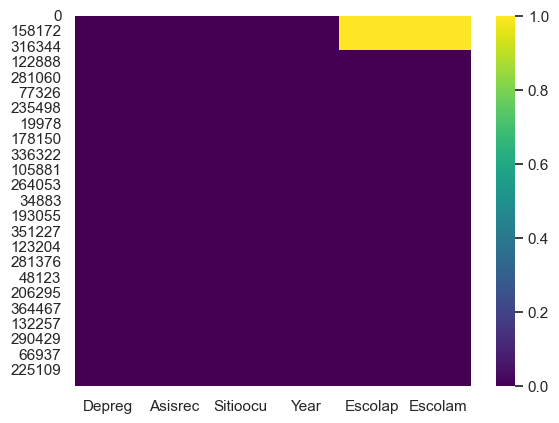

In [301]:
sns.heatmap(data.isna(), cmap='viridis')
plt.show()

Podemos observar que en nuestro dataset a utilizar contamos con algunos registros faltantes. Estos estan ubicados especificamente en las columnas de escolaridad de la madre y del padre del nacido.

In [302]:
data.head

<bound method NDFrame.head of               Depreg    Asisrec     Sitioocu  Year        Escolap  \
0          Guatemala     Medica    Domicilio  2009            NaN   
1          Guatemala     Medica    Domicilio  2009            NaN   
2          Guatemala     Medica    Domicilio  2009            NaN   
3          Guatemala     Medica    Domicilio  2009            NaN   
4          Guatemala     Medica    Domicilio  2009            NaN   
...              ...        ...          ...   ...            ...   
383258        Quiche     Medico  Vía Pública  2018         Básica   
383259     Escuintla   Empirico  Vía Pública  2018  Diversificado   
383260  Alta Verapaz   Empirico  Vía Pública  2018       Primaria   
383261         Peten   Empirico  Vía Pública  2018        Ninguno   
383262        Quiche  Comadrona  Vía Pública  2018       Ignorado   

              Escolam  
0                 NaN  
1                 NaN  
2                 NaN  
3                 NaN  
4                 NaN

In [303]:
data.tail

<bound method NDFrame.tail of               Depreg    Asisrec     Sitioocu  Year        Escolap  \
0          Guatemala     Medica    Domicilio  2009            NaN   
1          Guatemala     Medica    Domicilio  2009            NaN   
2          Guatemala     Medica    Domicilio  2009            NaN   
3          Guatemala     Medica    Domicilio  2009            NaN   
4          Guatemala     Medica    Domicilio  2009            NaN   
...              ...        ...          ...   ...            ...   
383258        Quiche     Medico  Vía Pública  2018         Básica   
383259     Escuintla   Empirico  Vía Pública  2018  Diversificado   
383260  Alta Verapaz   Empirico  Vía Pública  2018       Primaria   
383261         Peten   Empirico  Vía Pública  2018        Ninguno   
383262        Quiche  Comadrona  Vía Pública  2018       Ignorado   

              Escolam  
0                 NaN  
1                 NaN  
2                 NaN  
3                 NaN  
4                 NaN

In [304]:
data.columns

Index(['Depreg', 'Asisrec', 'Sitioocu', 'Year', 'Escolap', 'Escolam'], dtype='object')

In [305]:
data

,Depreg,Asisrec,Sitioocu,Year,Escolap,Escolam
0,Guatemala,Medica,Domicilio,2009,NaN,NaN
1,Guatemala,Medica,Domicilio,2009,NaN,NaN
2,Guatemala,Medica,Domicilio,2009,NaN,NaN
3,Guatemala,Medica,Domicilio,2009,NaN,NaN
4,Guatemala,Medica,Domicilio,2009,NaN,NaN
...,...,...,...,...,...,...
383258,Quiche,Medico,Vía Pública,2018,Básica,Diversificado
383259,Escuintla,Empirico,Vía Pública,2018,Diversificado,Diversificado
383260,Alta Verapaz,Empirico,Vía Pública,2018,Primaria,Ninguno
383261,Peten,Empirico,Vía Pública,2018,Ninguno,Diversificado


In [306]:
data.shape

(3796110, 6)

In [307]:
data.dtypes

Depreg      category
Asisrec       object
Sitioocu      object
Year           int64
Escolap       object
Escolam       object
dtype: object

## Análisis Exploratorio

Podemos observar que en nuestro data set contamos con una unica variable numerica siendo el año del registro. Luego en cuanto a la escolaridad de ambos padres y el municipio y departamento de registro lo encontramos como categorico.

In [308]:
data['Escolam'] = data['Escolam'].fillna('Ninguno')
data['Escolap'] = data['Escolap'].fillna('Ninguno')

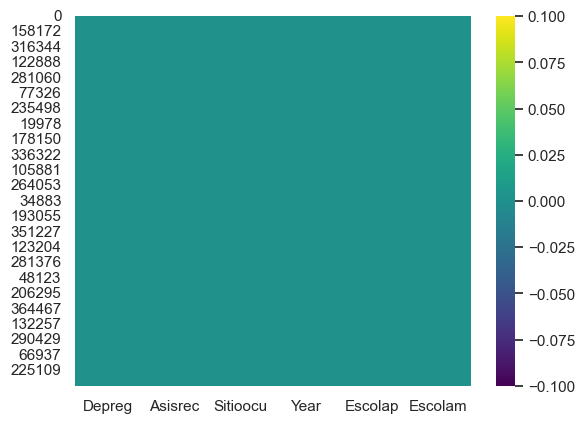

In [309]:
sns.heatmap(data.isna(), cmap='viridis')
plt.show()

In [310]:
data['Escolam'].unique()

array(['Ninguno', 'Diversificado', 'Universitario', 'Básica', 'Ignorado',
       'Primaria', 'Post Grado', 'Doctorado', 'Básico', 'Postgrado',
       'Post grado'], dtype=object)

In [311]:
data['Escolap'] = data['Escolap'].replace(['Post Grado', 'Post grado'], 'Postgrado')
data['Escolam'] = data['Escolap'].replace(['Post Grado', 'Post grado'], 'Postgrado')
data['Escolap'] = data['Escolap'].replace('Básico', 'Básica')
data['Escolam'] = data['Escolap'].replace('Básico', 'Básica')


In [312]:
data['Escolam'].unique()

array(['Ninguno', 'Diversificado', 'Universitario', 'Ignorado',
       'Postgrado', 'Básica', 'Primaria', 'Doctorado'], dtype=object)

In [313]:
data['Escolap'].unique()

array(['Ninguno', 'Diversificado', 'Universitario', 'Ignorado',
       'Postgrado', 'Básica', 'Primaria', 'Doctorado'], dtype=object)

Ahora vamos a codificar la escolaridad de la madre y del padre asignandoles un valor numerico a dichas variables. Para ello vamos a usar el diccionario de variables directamente brindado por el Instituto Nacional de Estadistica donde asignan:
- 1: Ninguno
- 2: Primaria
- 3: Básica
- 4: Diversificado
- 5: Universitario
- 6: Postgrado
- 7: Ignorado
- 8: Doctorado

In [314]:
data['Escolam'] = data['Escolam'].replace({
    'Ninguno': 1,
    'Primaria': 2,
    'Básica': 3,
    'Diversificado': 4,
    'Universitario': 5,
    'Postgrado': 6,
    'Ignorado': 7,
    'Doctorado': 8
})
data['Escolap'] = data['Escolap'].replace({
    'Ninguno': 1,
    'Primaria': 2,
    'Básica': 3,
    'Diversificado': 4,
    'Universitario': 5,
    'Postgrado': 6,
    'Ignorado': 7,
    'Doctorado': 8
})


In [315]:
data

,Depreg,Asisrec,Sitioocu,Year,Escolap,Escolam
0,Guatemala,Medica,Domicilio,2009,1,1
1,Guatemala,Medica,Domicilio,2009,1,1
2,Guatemala,Medica,Domicilio,2009,1,1
3,Guatemala,Medica,Domicilio,2009,1,1
4,Guatemala,Medica,Domicilio,2009,1,1
...,...,...,...,...,...,...
383258,Quiche,Medico,Vía Pública,2018,3,3
383259,Escuintla,Empirico,Vía Pública,2018,4,4
383260,Alta Verapaz,Empirico,Vía Pública,2018,2,2
383261,Peten,Empirico,Vía Pública,2018,1,1


Realizaremos el mismo proceso para codificar el municipio y departamento del registro de nacimiento. Utilizando el diccionario brindado oficial obtenemos:
Departamentos
1. Guatemala
2. El Progreso
3. Sacatepéquez
4. Chimaltenango
5. Escuintla
6. Santa Rosa
7. Sololá
8. Totonicapán
9. Quetzaltenango
10. Suchitepéquez
11. Retalhuleu
12. San Marcos
13. Huehuetenango
14. Quiché
15. Baja Verapaz
16. Alta Verapaz
17. Petén
18. Izabal
19. Zacapa
20. Chiquimula
21. Jalapa
22. Jutiapa

In [316]:
data['Depreg'] = data['Depreg'].replace({
    'Guatemala': 1,
    'El Progreso': 2,
    'Sacatepéquez': 3,
    'Chimaltenango': 4,
    'Escuintla': 5,
    'Santa Rosa': 6,
    'Sololá': 7,
    'Solola': 7,
    'Totonicapán': 8,
    'Quetzaltenango': 9,
    'Suchitepéquez': 10,
    'Retalhuleu': 11,
    'San Marcos': 12,
    'Huehuetenango': 13,
    'Quiché': 14,
    'Baja Verapaz': 15,
    'Alta Verapaz': 16,
    'Petén': 17,
    'Izabal': 18,
    'Zacapa': 19,
    'Chiquimula': 20,
    'Jalapa': 21,
    'Jutiapa': 22,
    'Guatemala': 1,
    'El Progreso': 2,
    'Sacatepequez': 3,
    'Chimaltenango': 4,
    'Escuintla': 5,
    'Santa Rosa': 6,
    'Solola': 7,
    'Totonicapan': 8,
    'Quetzaltenango': 9,
    'Suchitepecquez': 10,
    'Retalhuleu': 11,
    'San Marcos': 12,
    'Huehuetenango': 13,
    'Quiche': 14,
    'Baja Verapaz': 15,
    'Alta Verapaz': 16,
    'Peten': 17,
    'Izabal': 18,
    'Zacapa': 19,
    'Chiquimula': 20,
    'Jalapa': 21,
    'Jutiapa': 22,
    'Suchitepequez':10
})


In [317]:
print(list(data['Depreg'].unique()))

[1, 7, 6, 14, 18, 2, 22, 4, 3, 5, 21, 17, 20, 9, 12, 15, 16, 19, 10, 8, 11, 13]


Ahora codificamos la asistencia recibida y el sitio de ocurrencia <br>
Asistencia
- 'Medico':1
- 'Personal de Enfermeria':2
- 'Paramedico':3
- 'Comadrona':4
- 'Empirico':5
- 'Ninguno':6
- 'Ignorado':7

Sitio ocurrencia
- 'Hospital público':1
- 'Hospital privado':2
- 'Centro de salud':3
- 'Seguro social':4
- 'Vìa pública':5
- 'Domicilio':6
- 'Otro':7
- 'Ignorado':8

In [330]:
data['Asisrec'] = data['Asisrec'].replace({
'Medico':1,
'Medica':1,
'Médica':1,
'Personal de Enfermeria':2,
'Paramedico':3,
'Paramédica':3,
'Comadrona':4,
'Empirico':5,
'Empirica':5,
'Empírica':5,
'Ninguno':6,
'Ninguna':6,
'Ignorado':7
})

data['Sitioocu'] = data['Sitioocu'].replace({
'Hospital público':1,
'Hospital':1,
'Hospital privado':2,
'Centro de salud':3,
'Casa de salud':3,
'Seguro social':4,
'Vìa pública':5,
'Via pública':5,
'Via publica':5,
'Vía Pública':5,
'Domicilio':6,
'Otro':7,
'Ignorado':8

})

In [331]:
data['Sitioocu'].unique()

array([6, 5, 3, 1, 8, 2, 4, 7], dtype=int64)

In [332]:
data['Asisrec'].unique()

array([1, 6, 4, 7, 5, 3], dtype=int64)

In [333]:
data.dtypes

Depreg      category
Asisrec        int64
Sitioocu       int64
Year           int64
Escolap        int64
Escolam        int64
dtype: object

In [334]:
data.info

<bound method DataFrame.info of        Depreg  Asisrec  Sitioocu  Year  Escolap  Escolam
0           1        1         6  2009        1        1
1           1        1         6  2009        1        1
2           1        1         6  2009        1        1
3           1        1         6  2009        1        1
4           1        1         6  2009        1        1
...       ...      ...       ...   ...      ...      ...
383258     14        1         5  2018        3        3
383259      5        5         5  2018        4        4
383260     16        5         5  2018        2        2
383261     17        5         5  2018        1        1
383262     14        4         5  2018        7        7

[3796110 rows x 6 columns]>

In [335]:
data

,Depreg,Asisrec,Sitioocu,Year,Escolap,Escolam
0,1,1,6,2009,1,1
1,1,1,6,2009,1,1
2,1,1,6,2009,1,1
3,1,1,6,2009,1,1
4,1,1,6,2009,1,1
...,...,...,...,...,...,...
383258,14,1,5,2018,3,3
383259,5,5,5,2018,4,4
383260,16,5,5,2018,2,2
383261,17,5,5,2018,1,1


In [336]:
data.shape

(3796110, 6)

Ya con nuestro dataset codificado podemos proseguir

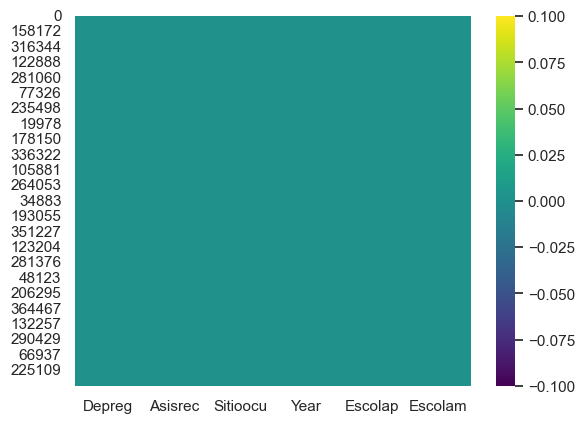

In [318]:
sns.heatmap(data.isna(), cmap='viridis')
plt.show()

In [319]:
print(data.size - merged_df.size)

-201193830
